In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
spray_data = pd.read_csv("west_nile/input/spray.csv")
weather_data = pd.read_csv("west_nile/input/weather.csv")
train_data = pd.read_csv("west_nile/input/train.csv")

In [3]:
weather_data = weather_data.replace('-', np.nan)
weather_data = weather_data.replace('M', np.nan)

C:\Users\User1bn6\AppData\Local\Temp\ipykernel_16192\650908028.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  weather_data = weather_data.replace('M', np.nan)


In [4]:
weather_data.describe(include='object')

,Date,Tavg,Depart,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,SnowFall,PrecipTotal,StnPressure,SeaLevel,AvgSpeed
count,2944,2933,1472,2940,2933,2933,1472,1472,2944,1472,1472,2942,2940,2935,2941
unique,1472,59,41,47,30,30,121,118,98,1,3,167,103,101,177
top,2014-09-22,73,2,63,0,0,0416,1931,,0,0.0,0.00,29.34,30.00,6.9
freq,2,138,93,135,1870,1147,104,96,1609,1472,1459,1577,128,96,63


In [5]:
weather_data.describe()

,Station,Tmax,Tmin,DewPoint,Water1,ResultSpeed,ResultDir
count,2944.000000,2944.000000,2944.000000,2944.000000,0.0,2944.000000,2944.000000
mean,1.500000,76.166101,57.810462,53.457880,NaN,6.960666,17.494905
std,0.500085,11.461970,10.381939,10.675181,NaN,3.587527,10.063609
min,1.000000,41.000000,29.000000,22.000000,NaN,0.100000,1.000000
25%,1.000000,69.000000,50.000000,46.000000,NaN,4.300000,7.000000
50%,1.500000,78.000000,59.000000,54.000000,NaN,6.400000,19.000000
75%,2.000000,85.000000,66.000000,62.000000,NaN,9.200000,25.000000
max,2.000000,104.000000,83.000000,75.000000,NaN,24.100000,36.000000


In [6]:
nulls = weather_data.isna().sum().to_frame().reset_index()
nulls = nulls[nulls.iloc[:, 1] != 0]
nulls

,index,0
4,Tavg,11
5,Depart,1472
7,WetBulb,4
8,Heat,11
9,Cool,11
10,Sunrise,1472
11,Sunset,1472
13,Depth,1472
14,Water1,2944
15,SnowFall,1472


In [7]:
weather_data['Date']  = pd.to_datetime(weather_data['Date'])

In [8]:
weather_data['Tavg'] = weather_data['Tavg'].astype(float)
weather_data['Tavg'].head(10)

0    67.0
1    68.0
2    51.0
3    52.0
4    56.0
5    58.0
6    58.0
7     NaN
8    60.0
9    60.0
Name: Tavg, dtype: float64

In [9]:
(weather_data['Tavg'] == np.ceil((weather_data['Tmax'] + weather_data['Tmin']) / 2)).sum()

np.int64(2933)

In [10]:
weather_data['Tavg'] = np.ceil((weather_data['Tmax'] + weather_data['Tmin']) / 2)

In [11]:
cols_to_drop = ['Depart','Depth','Water1','SnowFall']
weather_data = weather_data.drop(cols_to_drop, axis=1)
weather_data


,Station,Date,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67.0,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68.0,51,57,0,3,NaN,NaN,,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51.0,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52.0,42,47,13,0,NaN,NaN,BR HZ,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56.0,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,2,2014-10-29,49,40,45.0,34,42,20,0,NaN,NaN,,0.00,29.42,30.07,8.5,29,9.0
2940,1,2014-10-30,51,32,42.0,34,40,23,0,0622,1649,,0.00,29.34,30.09,5.1,24,5.5
2941,2,2014-10-30,53,37,45.0,35,42,20,0,NaN,NaN,RA,T,29.41,30.10,5.9,23,6.5
2942,1,2014-10-31,47,33,40.0,25,33,25,0,0623,1647,RA SN,0.03,29.49,30.20,22.6,34,22.9


<Axes: xlabel='Date', ylabel='WetBulb'>

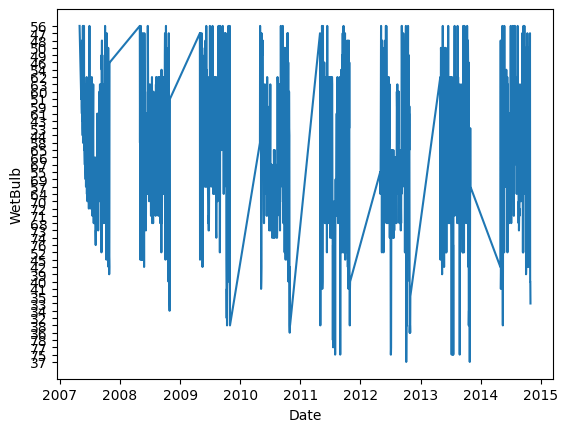

In [14]:
fig
sns.lineplot(weather_data.query('Station == 1'),x="Date", y="WetBulb", hue=None)
